In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
for col in df.columns[3:]:
    print(f'Value counts in {col}:\n{df[col].value_counts()}')

Value counts in repeat_retailer:
1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64
Value counts in used_chip:
0.0    649601
1.0    350399
Name: used_chip, dtype: int64
Value counts in used_pin_number:
0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64
Value counts in online_order:
1.0    650552
0.0    349448
Name: online_order, dtype: int64
Value counts in fraud:
0.0    912597
1.0     87403
Name: fraud, dtype: int64


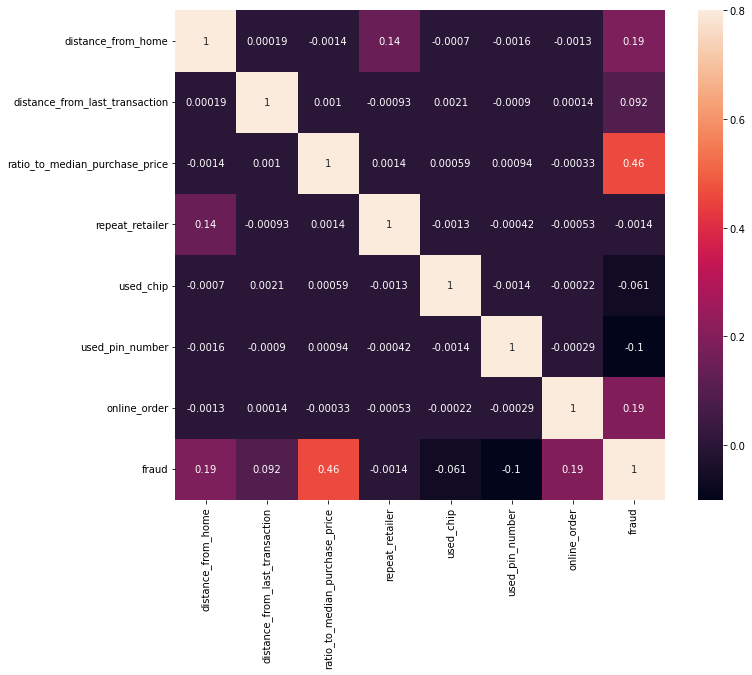

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True, vmax=.8, square=True);

<AxesSubplot:xlabel='fraud', ylabel='count'>

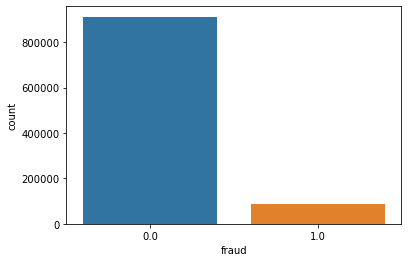

In [9]:
sns.countplot('fraud',data=df)

<AxesSubplot:xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

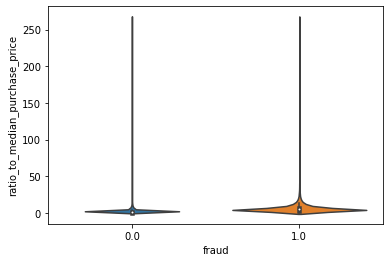

In [10]:
sns.violinplot('fraud','ratio_to_median_purchase_price',data=df)

<AxesSubplot:xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

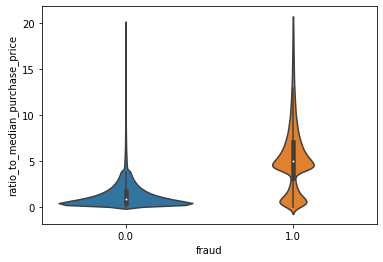

In [11]:
df1 = df[df['ratio_to_median_purchase_price'] < 20]
sns.violinplot('fraud','ratio_to_median_purchase_price',data=df1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = df['fraud']
X = df.drop('fraud', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [15]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [16]:
continuous = list(df.columns[:3])
categorical = list(df.columns[3:-1])

In [17]:
transformations = [('continuous', StandardScaler(), continuous), ('categorical', OrdinalEncoder(), categorical)]
pipeline = ColumnTransformer(transformations)

In [18]:
train_transformed = pipeline.fit_transform(X_train)

### Log Regression as a baseline ###

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
baseline = LogisticRegression(max_iter=100)

In [21]:
baseline.fit(train_transformed, y_train)

LogisticRegression()

In [22]:
test_transformed = pipeline.transform(X_test)
baseline_preds = baseline.predict(test_transformed)

In [23]:
baseline.score(test_transformed, y_test)

0.95838

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [25]:
confusion_matrix(y_test, baseline_preds)

array([[271851,   1928],
       [ 10558,  15663]], dtype=int64)

In [26]:
precision_score(y_test, baseline_preds)

0.8903984992325621

In [27]:
recall_score(y_test, baseline_preds)

0.5973456389916479

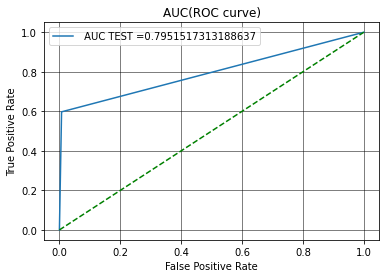

In [39]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, baseline_preds)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### SVC ###

In [28]:
from sklearn.svm import SVC

In [29]:
svc_clf = SVC(kernel='rbf', gamma='auto')

In [30]:
svc_clf.fit(train_transformed, y_train)

SVC(gamma='auto')

In [31]:
svc_clf.score(test_transformed, y_test)

0.9971133333333333

In [32]:
svc_preds = svc_clf.predict(test_transformed)

In [33]:
confusion_matrix(y_test, svc_preds)

array([[273505,    274],
       [   592,  25629]], dtype=int64)

In [34]:
precision_score(y_test, svc_preds)

0.9894220746631665

In [35]:
recall_score(y_test, svc_preds)

0.9774226764806834

In [36]:
from sklearn.metrics import roc_curve, auc

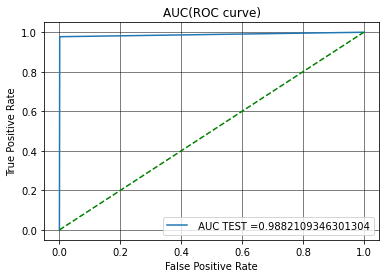

In [38]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, svc_preds)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()